Reporte de Clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

        Jedi       1.00      1.00      1.00       152
        Sith       1.00      1.00      1.00       246

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

f1-score en entrenamiento: 1.00


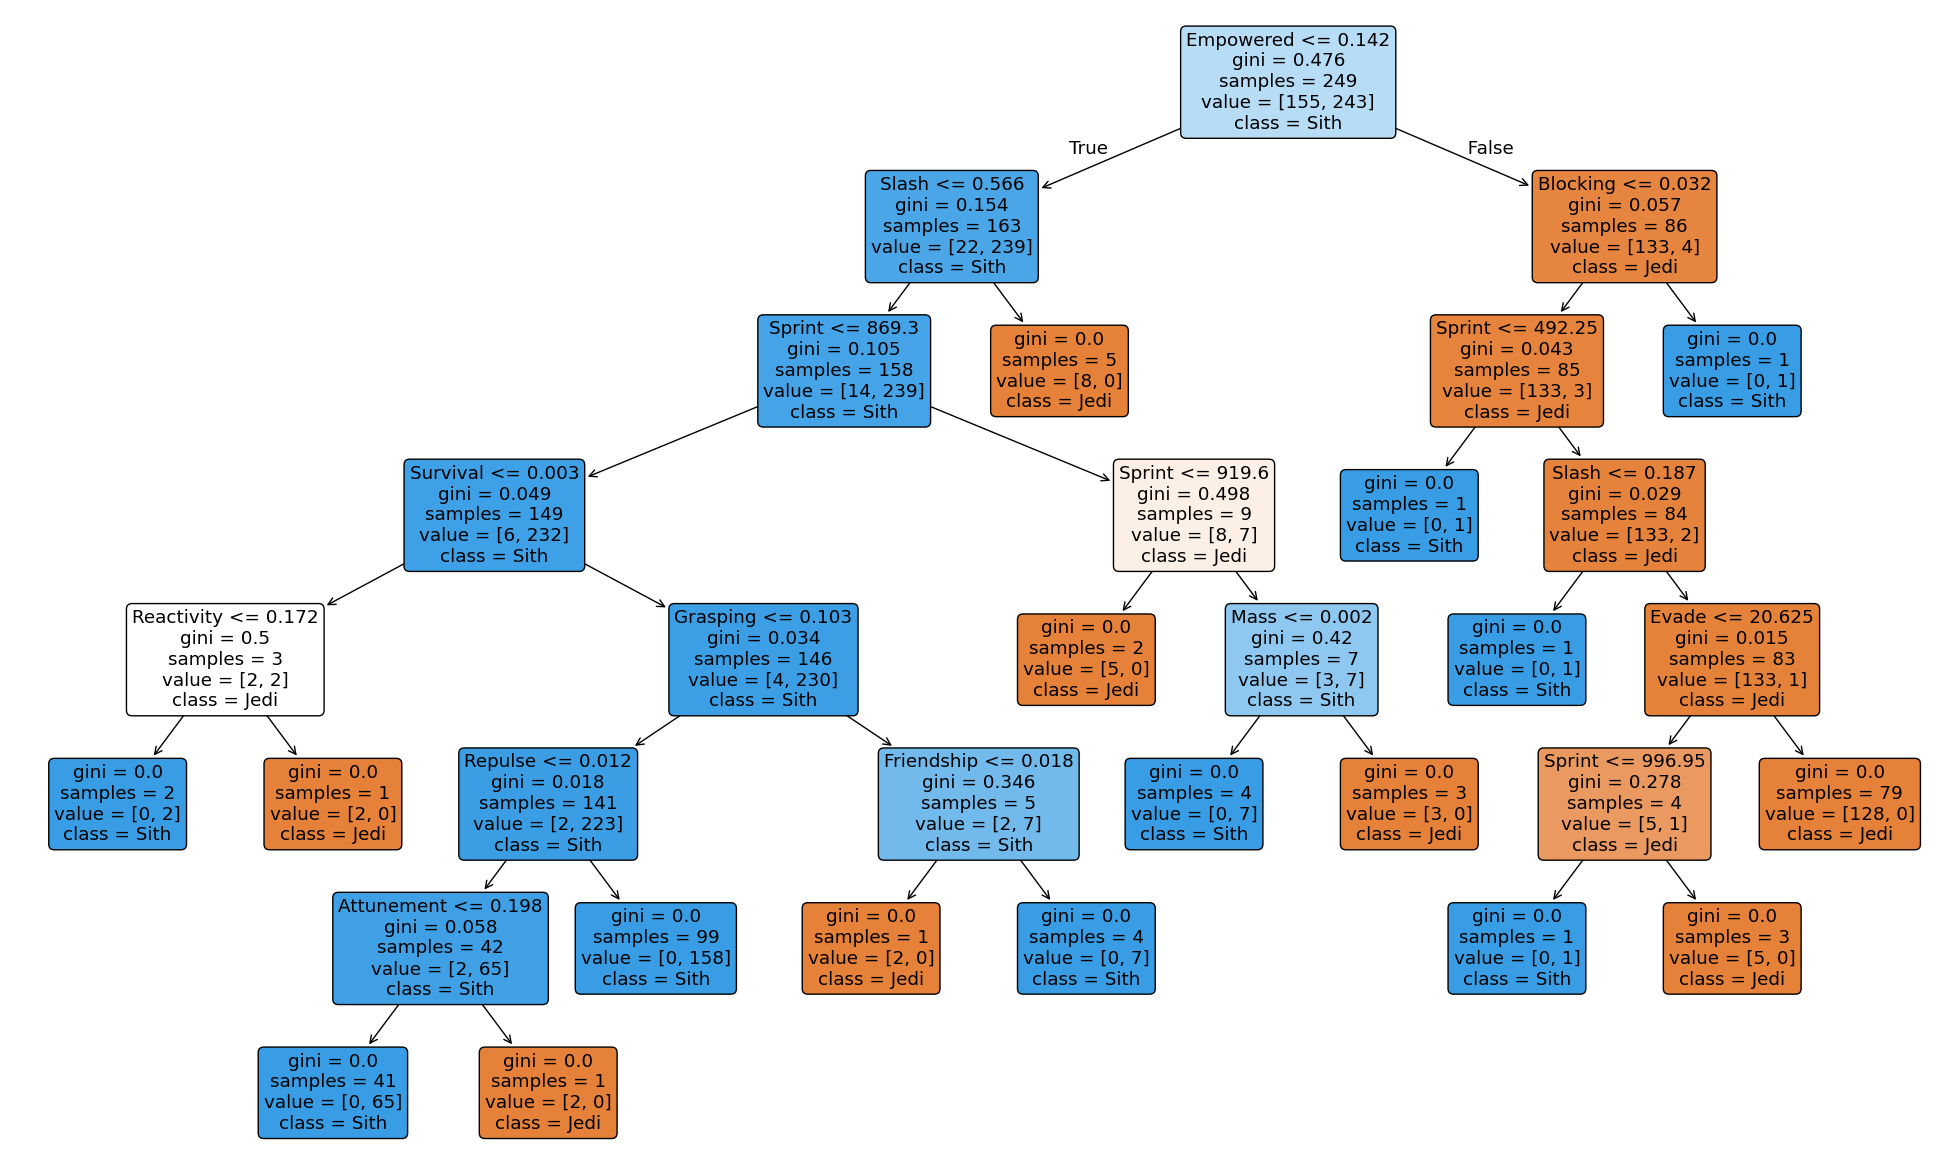

Predicciones guardadas en Tree.txt


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
import sys

# Función para cargar datos y preprocesarlos
def load_data(train_file, test_file):
    # Cargar los datos de entrenamiento y test
    data_train = pd.read_csv(train_file)
    data_test = pd.read_csv(test_file)

    # Separar las características (X) de la etiqueta ('knight') en los datos de entrenamiento
    X_train = data_train.drop(columns=['knight'])
    y_train = data_train['knight']

    # Las características del conjunto de prueba
    X_test = data_test

    return X_train, y_train, X_test

# Crear el modelo de Random Forest
def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluar el modelo
def evaluate_model(model, X_train, y_train):
    # Predecir sobre el conjunto de entrenamiento
    y_pred_train = model.predict(X_train)

    # Imprimir el reporte de clasificación
    report = classification_report(y_train, y_pred_train, labels=["Jedi", "Sith"])
    print("Reporte de Clasificación en el conjunto de entrenamiento:")
    print(report)

    # Calcular el f1-score
    f1 = f1_score(y_train, y_pred_train, average='weighted')
    print(f"f1-score en entrenamiento: {f1:.2f}")
    return f1

# Graficar el árbol de decisión
def display_tree(model, X_train):
    # Seleccionar el primer árbol del bosque aleatorio
    tree = model.estimators_[0]

    plt.figure(figsize=(25, 15))
    plot_tree(tree, feature_names=X_train.columns, class_names=["Jedi", "Sith"], filled=True, rounded=True)
    plt.show()

# Predecir y guardar las predicciones en un archivo
def make_predictions(model, X_test, output_file):
    predictions = model.predict(X_test)

    # Guardar las predicciones en un archivo de texto
    with open(output_file, 'w') as f:
        for pred in predictions:
            f.write(f"{pred}\n")

# Función principal
def main(train_file, test_file, output_file):
    # Cargar los datos
    X_train, y_train, X_test = load_data(train_file, test_file)

    # Entrenar el modelo de Random Forest
    model = train_random_forest(X_train, y_train)

    # Evaluar el modelo y asegurarse de que el f1-score sea al menos 90%
    f1 = evaluate_model(model, X_train, y_train)
    if f1 < 0.90:
        print("El f1-score es menor al 90%. Ajusta el modelo.")
        return

    # Graficar uno de los árboles del bosque aleatorio
    display_tree(model, X_train)

    # Hacer predicciones sobre el conjunto de test y guardarlas en Tree.txt
    make_predictions(model, X_test, output_file)
    print(f"Predicciones guardadas en {output_file}")

# Ejecutar el script desde la línea de comandos
#if __name__ == "__main__":
#    if len(sys.argv) != 4:
#        print("Uso: python script.py Train_knight.csv Test_knight.csv Tree.txt")
#    else:
#        main(sys.argv[1], sys.argv[2], sys.argv[3])

main("./subject/Train_knight.csv", "./subject/Test_knight.csv", "Tree.txt")